In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from plotter import StackHist, StackHistWithSignificance
from utils import ResultSet

Welcome to JupyROOT 6.08/06


In [3]:
rs_TTZ  = ResultSet("TTZ",  "../data_ichep/TTZToLLNuNu_treeProducerSusyMultilepton_tree.root")
rs_TTW  = ResultSet("TTW",  "../data_ichep/TTWToLNu_treeProducerSusyMultilepton_tree.root")
rs_TTH = ResultSet("TTH", "../data_ichep/TTHnobb_mWCutfix_ext1_treeProducerSusyMultilepton_tree.root")
rs_TTTT = ResultSet("TTTT", "../data_ichep/TTTT_ext_treeProducerSusyMultilepton_tree.root")

Running analysis for sample:  TTZ
Writing log data to ../data_ichep/TTZToLLNuNu_treeProducerSusyMultilepton_tree_result.log
Running analysis for sample:  TTW
Writing log data to ../data_ichep/TTWToLNu_treeProducerSusyMultilepton_tree_result.log
Running analysis for sample:  TTH
Writing log data to ../data_ichep/TTHnobb_mWCutfix_ext1_treeProducerSusyMultilepton_tree_result.log
Running analysis for sample:  TTTT
Writing log data to ../data_ichep/TTTT_ext_treeProducerSusyMultilepton_tree_result.log


In [4]:
def stack(attr, ax, title, cls=StackHist, stack_signal=False, scale = None, **kwargs):
    hs = cls(title)
    hs.add_mc_background(getattr(rs_TTZ, attr), 'TTZ', lumi=rs_TTZ.lumi, plot_color='r')
    hs.add_mc_background(getattr(rs_TTW, attr), 'TTW', lumi=rs_TTW.lumi, plot_color='g')
    hs.add_mc_background(getattr(rs_TTH, attr), 'TTH', lumi=rs_TTH.lumi, plot_color='b')
    if scale is None:
        scale = 1 if stack_signal else 20
    hs.set_mc_signal(getattr(rs_TTTT,attr), 'TTTT', lumi=rs_TTTT.lumi, stack=stack_signal, scale=scale, plot_color='k')
    
    hs.luminosity = 40
    hs.energy = 13
    hs.logy=False
    hs.draw(ax, **kwargs)

The main discriminating variables in the analysis are Jet and B-Jet Multiplicities

Below are shown the distributions for the TTTT as well as relevant BG processes. The "baseline" selection for the trilepton channel is:
  - Exactly three leptons
  - Three or more B-Jets
  - Z-Mass Window veto: The invariant mass of all same-flavor opposite-sign lepton pairs must be outside the Z-Mass window (70,105)GeV

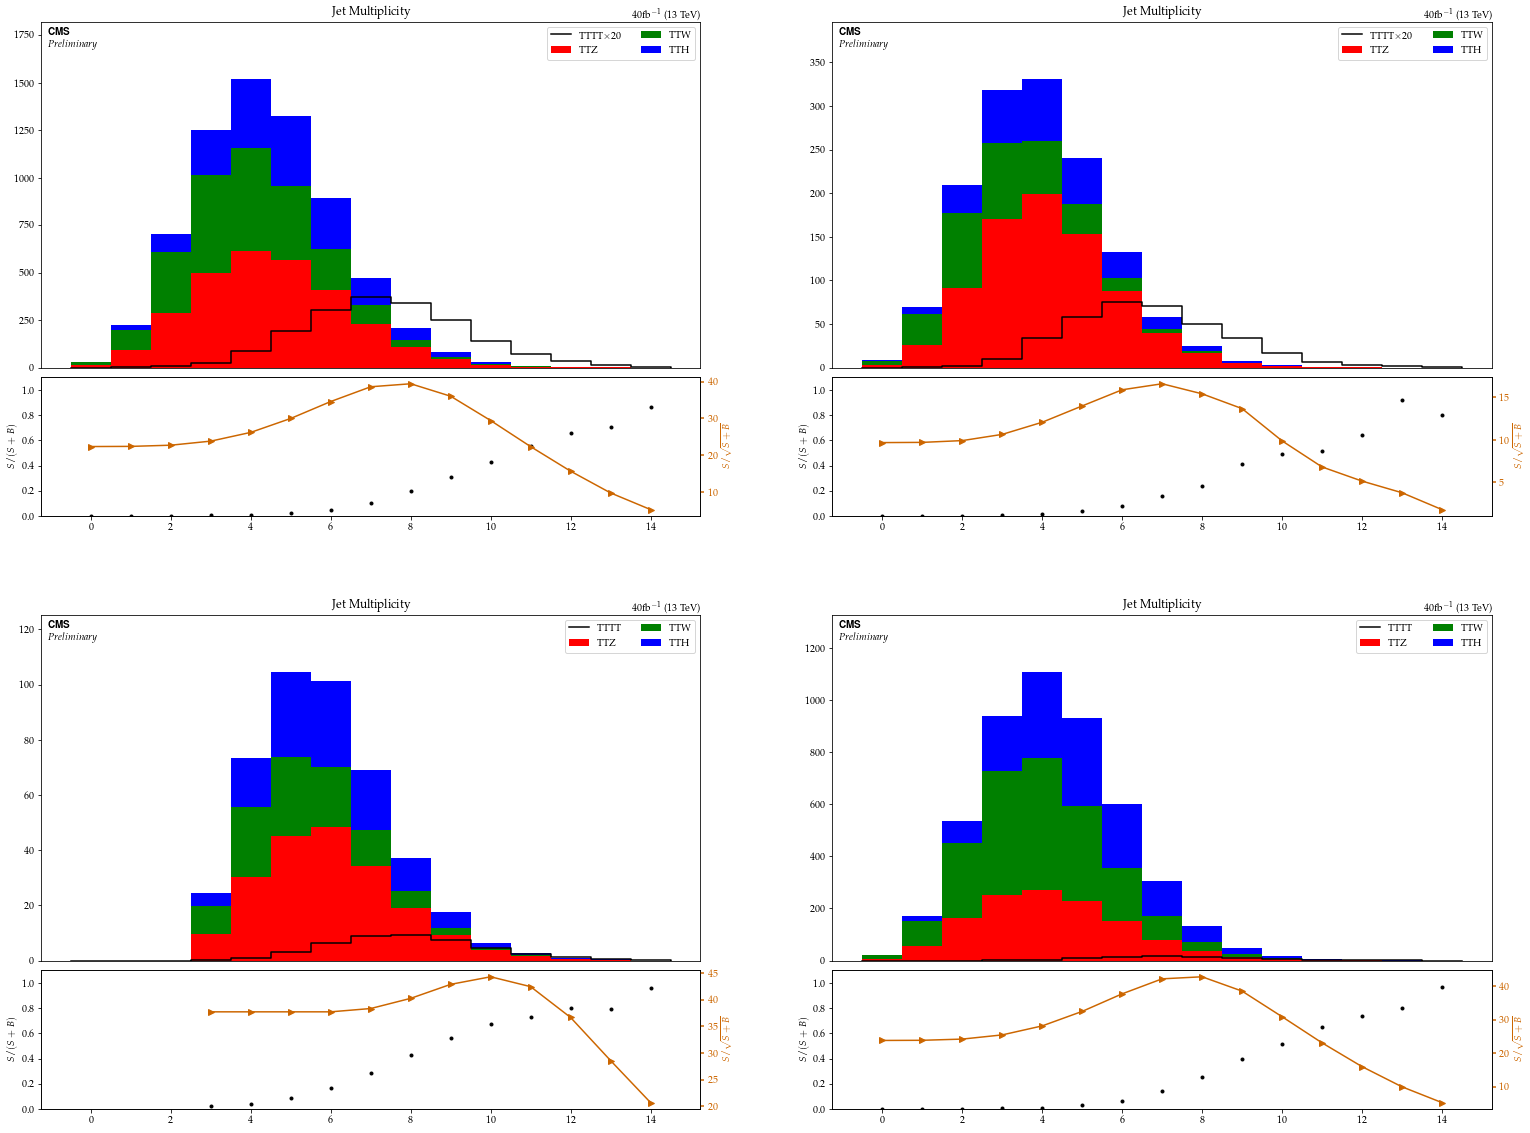

In [5]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, figsize=(26,20))
stack('jet_count', ax0, 'Jet Multiplicity', cls=StackHistWithSignificance, high_cut_significance=True)
stack('jet_count_trilepton', ax1, 'Jet Multiplicity', cls=StackHistWithSignificance, high_cut_significance=True)
stack('jet_count_b_jet3', ax2, 'Jet Multiplicity', cls=StackHistWithSignificance, scale=1, high_cut_significance=True)
stack('jet_count_z_mass_veto', ax3, 'Jet Multiplicity', cls=StackHistWithSignificance, scale=1, high_cut_significance=True)
# stack('b_jet_count_base_selection', ax3, 'B-Jet Multiplicity', cls=StackHistWithSignificance, scale=1, high_cut_significance=True)
# stack('b_jet_count', ax1, 'B-Jet Multiplicity', cls=StackHistWithSignificance, high_cut_significance=True)

# stack('lepton_count', ax4, 'Lepton Multiplicity', )
# stack('lepton_count', ax5, 'Lepton Multiplicity', stack_signal=True)

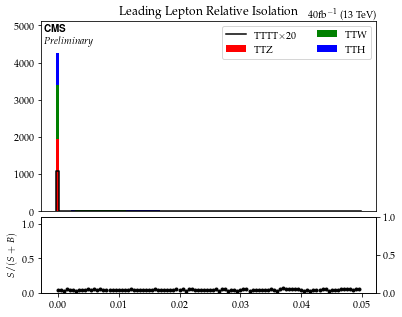

In [6]:
fig, (ax0) = plt.subplots(1,1, figsize=(6,5))
stack('leading_lepton_relIso', ax0, 'Leading Lepton Relative Isolation', stack_signal=False, cls=StackHistWithSignificance)

In [7]:
xs = list(rs_TTH.leading_lepton_relIso_all)
print(len([x for x in xs if x == 0]))
print(len([x for x in xs if x != 0]))

49106
41340


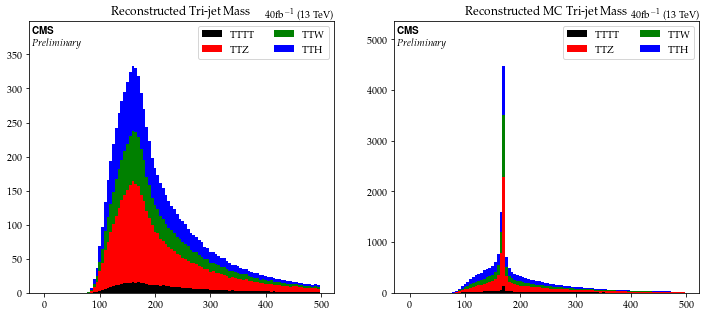

In [8]:
fig, ((ax0, ax1)) = plt.subplots(1,2, figsize=(12,5))
stack('reco_top_mass', ax0, 'Reconstructed Tri-jet Mass', stack_signal=True)
stack('mc_top_mass', ax1, 'Reconstructed MC Tri-jet Mass', stack_signal=True)

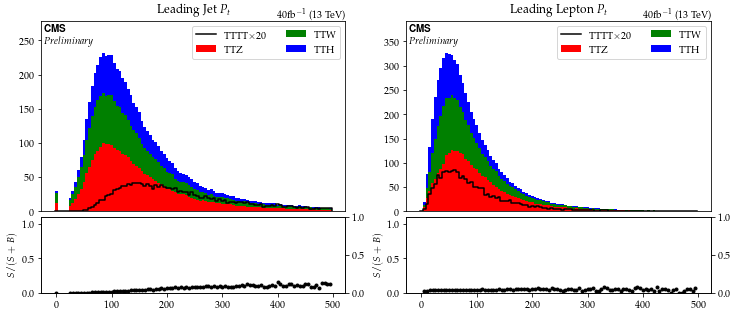

In [9]:
fig, ((ax0, ax1)) = plt.subplots(1,2, figsize=(12,5))
stack('leading_jet_pt', ax0, 'Leading Jet $P_t$', cls=StackHistWithSignificance, )
stack('leading_lepton_pt', ax1, 'Leading Lepton $P_t$', cls=StackHistWithSignificance, )

In [10]:
print(rs_TTH.b_jet3_count)
print(rs_TTH.trilepton_count)
print(rs_TTH.z_mass_veto_count)
print(rs_TTH.J4_count)
print(rs_TTH.J5_count)
print(rs_TTH.J6_count)
print('---')
print(rs_TTH.SR4j_count)
print(rs_TTH.SR5j_count)
print(rs_TTH.SR6j_count)

# 'ROOT.vectos' in str(type(rs_TTH.b_jet3_count))

7095
15515
82006
70289
49972
29240
---
138
103
62
